In [1]:
##### from pygradu import gridify
from pygradu import shortest_path
from pygradu import gridify
from pygradu import portcalls

import shapely.geometry
import pandas as pd
import numpy as np
import importlib

RESULTS_DIR = 'data/results/'
DATASET_DIR = 'data/datasets/'
SHAPES_DIR = 'data/shapes/'

importlib.reload(gridify)

grid_2500m = gridify.area_to_grid(side_length=2500)
grid_5km = gridify.area_to_grid(side_length=5000)

validation_voyages_summer = pd.read_csv(DATASET_DIR + 'validation_set_summer.csv', index_col=0, parse_dates = ['timestamp', 'ata', 'atd'])
validation_voyages_winter = pd.read_csv(DATASET_DIR + 'validation_set_winter.csv', index_col=0, parse_dates = ['timestamp', 'ata', 'atd'])


Original NE: POINT (31.5 66.8)
Original SW: POINT (8.5 53)
Transformed NE: (697681.2863658136, 7416224.9393330095)
Transformed SW: (-735260.4063631196, 6033964.466017238)
col_count 573
row_count 552
grid_size 316296
Original NE: POINT (31.5 66.8)
Original SW: POINT (8.5 53)
Transformed NE: (697681.2863658136, 7416224.9393330095)
Transformed SW: (-735260.4063631196, 6033964.466017238)
col_count 286
row_count 276
grid_size 78936


In [2]:
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open(SHAPES_DIR + 'sea_areas.geojson') as f:
    sea_areas = json.load(f)

def get_sea_area_from_latlon(sea_areas, lat, lon):
    point = Point(lon, lat)
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['id']
    return -1

def get_sea_area_name_from_latlon(sea_areas, lat, lon):
    point = Point(lon, lat)
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['name']
    return 'South'

def get_sea_area_name(sea_areas, _id):
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if int(feature['properties']['id']) == int(_id):
            return feature['properties']['name']
    return 'South'

#### Helper columns and variables for result examination

In [3]:
summer_results_5km_adj = pd.read_csv(RESULTS_DIR + 'summer_results_5km_adj_to_end.csv', index_col=0)
summer_results_5km_ship = pd.read_csv(RESULTS_DIR + 'summer_results_5km_ship_to_end.csv', index_col=0)
summer_results_2500m_adj = pd.read_csv(RESULTS_DIR + 'summer_results_2500m_adj_to_end.csv', index_col=0)

winter_results_5km_adj_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_to_end_5km_adj_no_dirways.csv', index_col=0)
winter_results_5km_adj_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_to_end_5km_adj_dirways.csv', index_col=0)
winter_results_5km_ship_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_5km_ship_to_end_no_dirways.csv', index_col=0)
winter_results_5km_ship_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_5km_ship_to_end_dirways.csv', index_col=0)
winter_results_2500m_adj_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_2500m_ship_to_end_no_dirways.csv', index_col=0)
winter_results_2500m_adj_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_2500m_ship_to_end_dirways.csv', index_col=0)
summer_results_5km_adj.head()

,voyage,vessel_type,end_port,end_port_sea_area,start_time,pred_time,mins_to_future,actual_lat,actual_lon,pred_lat,pred_lon,actual_speed,pred_speed,acc_distance_nm,error_rate_lat,error_rate_lon,error_rate_speed,correct_node
0,14,GC,19942,-1,2019-06-07 11:27:49.000000,2019-06-07 11:27:49.000000,0.000000,53.974982,11.340805,53.974982,11.340805,4.63,4.649501,3.819239e-13,1.316430e-14,0.000000,0.421189,1
1,14,GC,19942,-1,2019-06-07 11:27:49.000000,2019-06-07 11:35:43.000000,7.900000,53.992868,11.331420,53.992051,11.357935,4.63,4.649501,9.371762e-01,1.513326e-03,0.233991,0.421189,1
2,14,GC,19942,-1,2019-06-07 11:27:49.000000,2019-06-07 11:41:43.000000,13.900000,54.007890,11.331562,54.005014,11.370954,4.63,4.649501,1.400651e+00,5.325419e-03,0.347631,0.421189,1
3,14,GC,19942,-1,2019-06-07 11:27:49.000000,2019-06-07 11:47:53.000000,20.066667,54.018665,11.345753,54.018335,11.384343,4.42,4.649501,1.361401e+00,6.107745e-04,0.340124,5.192332,0
4,14,GC,19942,-1,2019-06-07 11:27:49.000000,2019-06-07 11:52:59.000000,25.166667,54.020092,11.367012,54.029351,11.395423,4.53,4.649501,1.145939e+00,1.714044e-02,0.249943,2.637993,0


In [4]:
importlib.reload(portcalls)

%time voyages_summer_lengths = portcalls.get_voyage_lengths(validation_voyages_summer)
%time voyages_winter_lengths = portcalls.get_voyage_lengths(validation_voyages_winter)
voyages_summer_lengths.describe()

CPU times: user 21.6 s, sys: 89.8 ms, total: 21.7 s
Wall time: 21.9 s
CPU times: user 11 s, sys: 43.9 ms, total: 11 s
Wall time: 11.1 s


,voyage,voyage_length,start_end_length,difference,travel_time,avg_speed
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,3299.927273,516.031082,408.732554,26.281408,1422.086162,6.296045
std,1756.757853,343.622339,256.768676,31.315226,1013.877433,1.895353
min,14.000000,9.368543,9.184511,0.453766,67.950000,1.564000
25%,2254.250000,284.000496,259.338044,5.739473,638.200000,5.034446
50%,2996.000000,404.163412,324.668310,14.700501,1118.750000,5.986336
75%,4895.000000,635.502617,498.671228,31.509834,1857.175000,7.939009
max,6576.000000,2029.400648,1317.256220,173.280797,5353.933333,10.909583


In [5]:
ports = pd.read_csv(DATASET_DIR + 'ports.csv')
ports = ports[['port_id', 'lat', 'lon']]
print(len(ports))

ais_ports = pd.read_csv(DATASET_DIR + 'ports_calculated_from_ais.csv')
ais_ports = ais_ports[['id', 'lat', 'lon']]
ais_ports.columns=['port_id', 'lat', 'lon']

ports = ports.append(ais_ports)

157


In [6]:
importlib.reload(portcalls)

voyages_summer = summer_results_5km_adj[['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_time']].drop_duplicates()
voyages_summer['start_lat'] = voyages_summer.apply(lambda row: summer_results_5km_adj[summer_results_5km_adj.voyage == row.voyage].head(1).iloc[0].actual_lat, axis=1)
voyages_summer['start_lon'] = voyages_summer.apply(lambda row: summer_results_5km_adj[summer_results_5km_adj.voyage == row.voyage].head(1).iloc[0].actual_lon, axis=1)
voyages_summer['start_sea_area'] = voyages_summer.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.start_lat, row.start_lon), axis=1)
voyages_summer['start_port'] = voyages_summer.apply(lambda row: portcalls.get_port_id(row, ports), axis=1)

In [7]:
importlib.reload(portcalls)

voyages_winter = winter_results_5km_adj_no_dirway[['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_time']].drop_duplicates()
voyages_winter['start_lat'] = voyages_winter.apply(lambda row: winter_results_5km_adj_no_dirway[winter_results_5km_adj_no_dirway.voyage == row.voyage].head(1).iloc[0].actual_lat, axis=1)
voyages_winter['start_lon'] = voyages_winter.apply(lambda row: winter_results_5km_adj_no_dirway[winter_results_5km_adj_no_dirway.voyage == row.voyage].head(1).iloc[0].actual_lon, axis=1)
voyages_winter['start_sea_area'] = voyages_winter.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.start_lat, row.start_lon), axis=1)
voyages_winter['start_port'] = voyages_summer.apply(lambda row: portcalls.get_port_id(row, ports), axis=1)

#### Comparing median results of different models

In [8]:
results = []
results.append(np.append(summer_results_5km_adj.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'summer_results_5km_adj'))
results.append(np.append(summer_results_5km_ship.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'summer_results_5km_ship'))
results.append(np.append(summer_results_2500m_adj.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'summer_results_2500m_adj'))

results.append(np.append(winter_results_5km_adj_no_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_5km_adj_no_dirway'))
results.append(np.append(winter_results_5km_adj_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_5km_adj_dirway'))
results.append(np.append(winter_results_5km_ship_no_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_5km_ship_no_dirway'))
results.append(np.append(winter_results_5km_ship_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_5km_ship_dirway'))
results.append(np.append(winter_results_2500m_adj_no_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_2500m_adj_no_dirway'))
results.append(np.append(winter_results_2500m_adj_dirway.describe().loc[['50%'], ['mins_to_future', 'acc_distance_nm', 'correct_node']].values, 'winter_results_2500m_adj_dirway'))

results = pd.DataFrame(data=results, columns=['mins_to_future', 'acc_distance_nm', 'correct_node', 'model'])
results.sort_values(by='acc_distance_nm')

,mins_to_future,acc_distance_nm,correct_node,model
1,716.4666666666667,13.719029596672332,0.0,summer_results_5km_ship
0,754.85,15.263242325973387,0.0,summer_results_5km_adj
2,784.6333333333332,15.737912061138902,0.0,summer_results_2500m_adj
3,1570.8333333333333,24.29263770063627,0.0,winter_results_5km_adj_no_dirway
4,1588.95,25.642677561746712,0.0,winter_results_5km_adj_dirway
6,1510.0333333333333,25.715536712968166,0.0,winter_results_5km_ship_dirway
7,1520.2,26.725314098169125,0.0,winter_results_2500m_adj_no_dirway
8,1542.6,27.44212143562052,0.0,winter_results_2500m_adj_dirway
5,1495.0,28.079261895082464,0.0,winter_results_5km_ship_no_dirway


#### Summer result examination

In [9]:
# Append start ports to summer_results_5km_ship

%time summer_results_5km_ship['start_port_sea_area'] = summer_results_5km_ship.apply(lambda row: voyages_summer[voyages_summer.voyage == row.voyage].iloc[0].start_sea_area, axis=1)

acc_by_voyage = []

for index, row in voyages_summer.iterrows():
    voyage_results = summer_results_5km_ship[summer_results_5km_ship.voyage == row.voyage]
    
    voyage_results = voyage_results.describe().loc[['mean', '50%', 'std'], ['mins_to_future', 'acc_distance_nm', 'correct_node']]
    length = voyages_summer_lengths[voyages_summer_lengths.voyage == row.voyage].iloc[0].voyage_length
    start_port = voyages_summer[voyages_summer.voyage == row.voyage].iloc[0].start_port
    acc_by_voyage.append([row.voyage, row.vessel_type, row.end_port, row.end_port_sea_area, start_port, row.start_sea_area, voyage_results.loc['50%', 'acc_distance_nm'], voyage_results.loc['mean', 'acc_distance_nm'], voyage_results.loc['50%', 'mins_to_future'], voyage_results.loc['mean', 'mins_to_future'], length])
    
acc_by_voyage = pd.DataFrame(data=acc_by_voyage, columns=['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_port', 'start_sea_area', 'median_acc_distance_nm', 'mean_acc_distance_nm', 'median_mins_to_future', 'mean_mins_to_future', 'length'])
acc_by_voyage.describe()

CPU times: user 1min 16s, sys: 1.07 s, total: 1min 17s
Wall time: 1min 27s


,voyage,end_port,end_port_sea_area,start_port,start_sea_area,median_acc_distance_nm,mean_acc_distance_nm,median_mins_to_future,mean_mins_to_future,length
count,330.000000,3.300000e+02,330.000000,2.800000e+02,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,3299.927273,1.045565e+06,6.090909,8.433189e+05,13.333333,17.827735,17.548266,642.407828,640.686367,516.031082
std,1756.757853,2.493300e+06,4.083949,2.438744e+06,77.179366,19.305590,18.217136,459.301232,452.067479,343.622339
min,14.000000,9.230000e+02,-1.000000,9.150000e+02,-1.000000,0.187049,0.174912,26.966667,27.228788,9.368543
25%,2254.250000,1.007000e+03,3.000000,9.750000e+02,5.000000,5.655007,6.139788,290.387500,293.152047,284.000496
50%,2996.000000,2.345000e+03,6.000000,1.051000e+03,8.000000,11.379913,11.195742,536.741667,533.535148,404.163412
75%,4895.000000,1.976225e+04,10.000000,1.411950e+04,11.000000,22.472049,22.159794,832.081250,859.208609,635.502617
max,6576.000000,8.616642e+06,13.000000,1.583330e+07,999.000000,142.514841,128.089890,2687.983333,2594.233273,2029.400648


In [10]:
import matplotlib.pyplot as plt

acc_by_voyage[['mean_acc_distance_nm']].hist(figsize=(10,10), bins=20, grid=False, xlabelsize=15, ylabelsize=15)
plt.title('')
plt.xticks(np.arange(0, 150, 15)) 
plt.yticks(np.arange(0, 90, 10)) 
plt.xlabel("Mean error (nm) of voyage", fontsize=23)
plt.ylabel("Frequency",fontsize=23)

Text(0, 0.5, 'Frequency')

In [11]:
acc_by_route = acc_by_voyage.groupby(['start_port', 'end_port'], as_index=False).mean()
bad_routes = acc_by_route[acc_by_route.median_acc_distance_nm > 25]
bad_voyages = acc_by_voyage[acc_by_voyage.start_port.isin(bad_routes.start_port) & acc_by_voyage.end_port.isin(bad_routes.end_port)].voyage.values
print('Number of summer bad voyages =', len(bad_voyages))

Number of summer bad voyages = 111


#### Results by different routes

In [12]:
# 10 Best predicted routes
acc_by_route.sort_values(by='median_acc_distance_nm').head(10)

,start_port,end_port,voyage,end_port_sea_area,start_sea_area,median_acc_distance_nm,mean_acc_distance_nm,median_mins_to_future,mean_mins_to_future,length
69,1043.0,7546455,4425.285714,13.0,13.0,0.276629,0.345191,34.972619,35.050886,11.598525
171,7546470.0,7546473,2289.000000,13.0,13.0,0.919550,0.921423,123.452083,123.434149,73.543277
172,7546470.0,7546485,2257.000000,13.0,13.0,1.820975,2.228836,331.437500,330.788532,174.273163
68,1043.0,951,1582.000000,5.0,13.0,2.513912,4.135208,647.666667,650.719364,361.032081
43,979.0,967,5702.000000,3.0,5.0,2.634311,3.662950,788.591667,789.010658,557.083198
159,3108068.0,1013,3543.000000,4.0,5.0,2.768965,4.530031,429.258333,427.710654,336.574701
168,7546455.0,7546473,4668.000000,13.0,13.0,3.272348,3.717961,392.400000,391.589669,219.361094
33,953.0,2345,3581.000000,10.0,8.0,3.471620,3.528142,525.650000,516.433235,324.356839
107,1182.0,2803,3617.000000,11.0,11.0,3.507708,4.121115,477.400000,450.398111,273.146546
45,979.0,24228,5958.000000,7.0,5.0,3.548798,3.735759,398.650000,404.829487,287.499618


In [13]:
# 10 Worst predicted routes
acc_by_route.sort_values(by='median_acc_distance_nm', ascending=False).head(10)

,start_port,end_port,voyage,end_port_sea_area,start_sea_area,median_acc_distance_nm,mean_acc_distance_nm,median_mins_to_future,mean_mins_to_future,length
135,24228.0,977,3491.000000,5.0,7.0,97.560470,76.593302,778.750000,764.923966,668.300710
93,1081.0,935,6502.000000,1.0,-1.0,91.337493,80.551126,2687.983333,2594.233273,2029.400648
122,8886.0,1242,971.000000,10.0,11.0,89.717544,79.364666,813.700000,834.010256,688.375756
21,937.0,2345,4581.500000,10.0,11.0,85.596240,75.150600,588.225000,582.712146,720.973072
32,953.0,1013,3663.000000,4.0,8.0,84.797563,79.289357,793.333333,751.855732,702.830093
31,953.0,977,1450.000000,5.0,8.0,78.178722,76.036897,1132.183333,1105.121130,904.444474
94,1083.0,3347,1970.333333,-1.0,3.0,74.978014,74.251207,823.477778,894.872474,1102.493112
66,1029.0,999,2617.000000,1.0,8.0,73.456862,65.320086,1305.833333,1302.488616,1073.752750
17,929.0,4081153,3129.000000,3.0,11.0,72.889488,70.439491,1639.241667,1617.282471,1112.094828
140,25182.0,935,3126.000000,1.0,-1.0,68.746026,66.565021,2366.533333,2230.838366,1936.563744


#### Winter result examination

In [14]:
acc_by_voyage_winter = []
for index, row in voyages_winter.iterrows():
    voyage_results = winter_results_5km_ship_dirway[winter_results_5km_ship_dirway.voyage == row.voyage]
    
    voyage_results = voyage_results.describe().loc[['mean', '50%', 'std'], ['mins_to_future', 'acc_distance_nm', 'correct_node']]
    length = voyages_winter_lengths[voyages_winter_lengths.voyage == row.voyage].iloc[0].voyage_length
    start_port = voyages_winter[voyages_winter.voyage == row.voyage].iloc[0].start_port
    acc_by_voyage_winter.append([row.voyage, row.vessel_type, row.end_port, row.end_port_sea_area, start_port, row.start_sea_area, voyage_results.loc['50%', 'acc_distance_nm'], voyage_results.loc['mean', 'acc_distance_nm'], voyage_results.loc['50%', 'mins_to_future'], voyage_results.loc['mean', 'mins_to_future'], length])
    
acc_by_voyage_winter = pd.DataFrame(data=acc_by_voyage_winter, columns=['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_port', 'start_sea_area', 'median_acc_distance_nm', 'mean_acc_distance_nm', 'median_mins_to_future', 'mean_mins_to_future', 'length'])
acc_by_voyage_winter.describe()

,voyage,end_port,end_port_sea_area,start_port,start_sea_area,median_acc_distance_nm,mean_acc_distance_nm,median_mins_to_future,mean_mins_to_future,length
count,81.000000,8.100000e+01,81.000000,0.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,310.728395,4.187657e+04,1.530864,NaN,3.172840,31.290260,32.006126,1353.757716,1360.127769,1114.098253
std,181.453301,3.342383e+05,2.627196,NaN,3.787447,28.495452,27.464566,704.439667,703.059341,594.746713
min,5.000000,9.310000e+02,-1.000000,NaN,-1.000000,1.154120,1.545767,103.458333,103.806250,80.657340
25%,143.000000,9.990000e+02,-1.000000,NaN,1.000000,11.543669,13.025306,725.683333,727.582357,534.406915
50%,341.000000,1.073000e+03,1.000000,NaN,1.000000,21.566662,23.450054,1458.616667,1528.282250,1138.545480
75%,438.000000,6.652000e+03,2.000000,NaN,3.000000,39.027634,40.488257,1803.516667,1911.968476,1674.517523
max,627.000000,3.012222e+06,9.000000,NaN,11.000000,134.201452,134.266838,2632.566667,2536.528345,1966.384680


In [15]:
acc_by_route = acc_by_voyage_winter.groupby(['start_sea_area', 'end_port'], as_index=False).mean()
acc_by_route.sort_values(by='median_acc_distance_nm').head(10)

,start_sea_area,end_port,voyage,end_port_sea_area,start_port,median_acc_distance_nm,mean_acc_distance_nm,median_mins_to_future,mean_mins_to_future,length
13,1,1047,575.000000,1.0,NaN,1.154120,1.545767,103.458333,103.806250,80.657340
6,1,959,382.000000,1.0,NaN,2.837414,2.817017,142.933333,143.772727,103.952690
18,1,1109,122.000000,3.0,NaN,3.360111,3.706977,681.250000,677.741862,478.823139
17,1,1073,46.000000,1.0,NaN,3.752657,4.548791,123.966667,123.303546,112.534701
26,3,935,5.000000,1.0,NaN,4.221587,16.334239,824.350000,783.154426,566.226600
12,1,1041,119.000000,3.0,NaN,4.870667,9.389512,555.416667,557.564794,426.519036
36,11,999,364.000000,1.0,NaN,6.732660,12.249679,2420.500000,2422.516938,1778.804769
22,1,17602,89.000000,7.0,NaN,7.038882,7.797875,1544.783333,1553.986034,1159.349451
2,1,931,623.000000,5.0,NaN,8.157920,7.437350,1759.150000,1691.948614,1138.545480
8,1,975,302.333333,1.0,NaN,9.175998,10.758505,325.208333,327.810972,253.071202


#### Results by sea areas in summer

In [16]:

sea_area_accuracies = []
for sea_area in summer_results_5km_ship.end_port_sea_area.drop_duplicates().values:
    sea_area_results = summer_results_5km_ship[(summer_results_5km_ship.start_port_sea_area == sea_area) | (summer_results_5km_ship.end_port_sea_area == sea_area)]
    count = len(summer_results_5km_ship[(summer_results_5km_ship.start_port_sea_area == sea_area)].voyage.drop_duplicates())
    count += len(summer_results_5km_ship[(summer_results_5km_ship.end_port_sea_area == sea_area)].voyage.drop_duplicates())
    accuracy = sea_area_results.describe().loc[['mean', '50%', 'std'], ['mins_to_future', 'acc_distance_nm', 'correct_node']]
    
    sea_area_accuracies.append([sea_area, accuracy.loc['50%', 'acc_distance_nm'], accuracy.loc['mean', 'acc_distance_nm'], accuracy.loc['std', 'acc_distance_nm'], accuracy.loc['50%', 'mins_to_future'], accuracy.loc['mean', 'mins_to_future'], accuracy.loc['std', 'mins_to_future'], count])

sea_area_accuracies = pd.DataFrame(data=sea_area_accuracies, columns=['sea_area', 'median_acc_distance_nm', 'mean_acc_distance_nm', 'std_acc_distance_nm', 'median_mins_to_future', 'mean_mins_to_future', 'std_mins_to_future', 'count'])
sea_area_accuracies = sea_area_accuracies.sort_values(by='median_acc_distance_nm')

In [17]:
sea_area_accuracies['sea_area_name'] = sea_area_accuracies.apply(lambda row: get_sea_area_name(sea_areas, row.sea_area), axis=1)
sea_area_accuracies = sea_area_accuracies[['sea_area_name', 'median_acc_distance_nm', 'mean_acc_distance_nm',  'std_acc_distance_nm', 'median_mins_to_future', 'mean_mins_to_future', 'std_mins_to_future', 'count']]
sea_area_accuracies.round(1)#.to_excel('summer_tr_results.xlsx')

,sea_area_name,median_acc_distance_nm,mean_acc_distance_nm,std_acc_distance_nm,median_mins_to_future,mean_mins_to_future,std_mins_to_future,count
10,Saimaa,2.8,4.4,4.4,304.5,372.7,307.0,60
7,Åland Sea,10.8,18.0,19.9,527.8,628.4,465.9,50
4,Gulf of Finland,11.0,18.8,22.2,664.6,819.6,647.5,86
2,Gulf of Riga,11.7,18.0,19.5,794.4,873.6,594.1,33
9,Bothnian Sea & The Quark,11.9,23.1,27.9,896.8,1034.1,758.0,56
6,Gotland Basin,12.6,21.1,22.4,584.0,760.3,619.8,77
8,Northern Baltic Proper,15.1,19.6,18.1,406.8,582.7,533.3,47
5,Arkona Basin & Bomholm Basin,15.6,26.0,29.0,828.7,1089.7,923.7,96
3,Gdansk Basin,17.5,25.3,27.8,618.6,813.5,711.0,66
0,South,18.8,33.8,33.8,839.5,1138.9,1006.5,49


In [18]:
def plot_intervals(results, col_x, col_y, interval):
    bins = []
    labels = []

    i = 0
    while i < results[col_x].max():
        bins.append(i)
        labels.append(int(i))
        i += interval
    del labels[0]

    results['interval'] = pd.cut(results[col_x], bins=bins, labels=labels)

    x = [0]
    y = [0]

    for group, voyage_results in results.groupby('interval'):
        if(len(voyage_results)) < 3 or group/60 > 72:
            continue
        y.append(voyage_results[col_y].mean())
        if np.isnan(group):
            group = 0
        x.append(group/60)
        
    return x, y

#### Summer traffic prediction accuracy over time

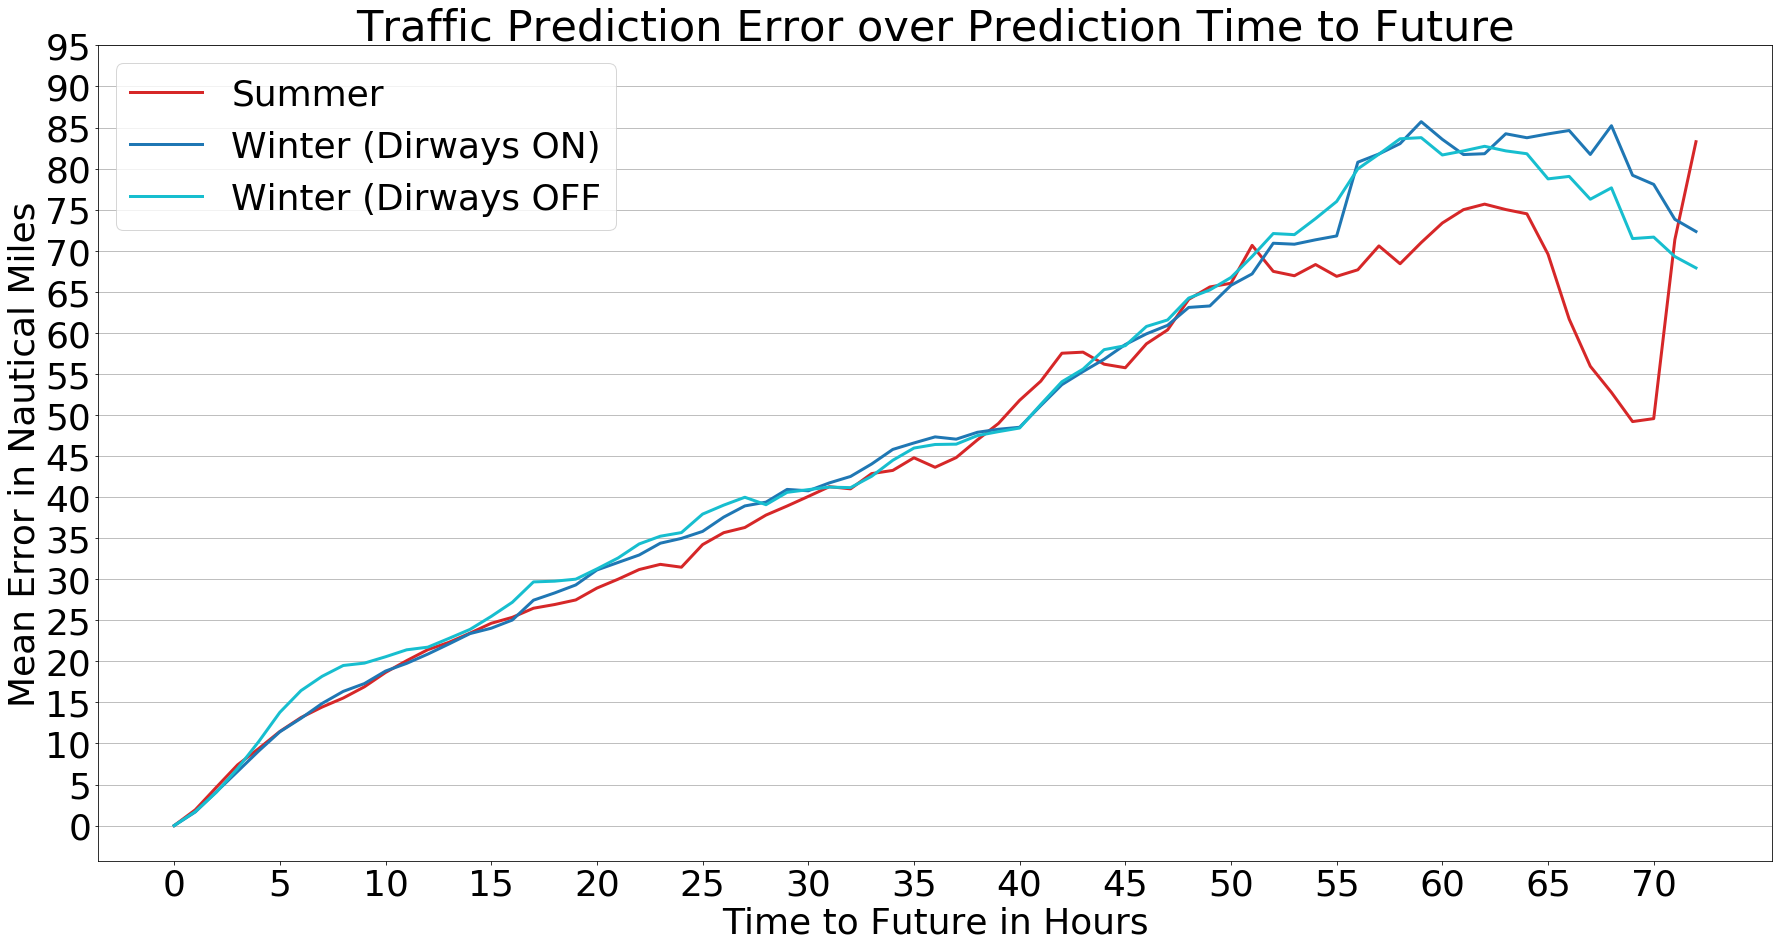

In [19]:
from scipy.interpolate import make_interp_spline, BSpline


fig = plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 36})

x, y = plot_intervals(summer_results_5km_ship,'mins_to_future', 'acc_distance_nm', 60)
plt.plot(x, y, alpha=1, linewidth=3, c='tab:red', label='Summer')

x, y = plot_intervals(winter_results_5km_ship_dirway,'mins_to_future', 'acc_distance_nm', 60)
plt.plot(x, y, alpha=1, linewidth=3, c='tab:blue', label='Winter (Dirways ON)')

x, y = plot_intervals(winter_results_5km_ship_no_dirway,'mins_to_future', 'acc_distance_nm', 60)
plt.plot(x, y, alpha=1, linewidth=3, c='tab:cyan', label='Winter (Dirways OFF')

plt.xticks(np.arange(0, 75, 5)) 
plt.yticks(np.arange(0, 100, 5)) 
plt.grid(axis='y', alpha=1)
plt.title(f"Traffic Prediction Error over Prediction Time to Future")
plt.ylabel("Mean Error in Nautical Miles")
plt.xlabel("Time to Future in Hours")
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)
plt.show()

In [20]:

vessel_type_accuracies = []
for vessel_type, vessel_type_results in summer_results_5km_ship.groupby('vessel_type'):
    #vessel_type_results = vessel_type_results[~vessel_type_results.voyage.isin(bad_voyages)]
    count = len(vessel_type_results.voyage.drop_duplicates())
    accuracy = vessel_type_results.describe().loc[['mean', '50%', 'std'], ['mins_to_future', 'acc_distance_nm', 'correct_node']]
    
    #voyage_lengths = actual_voyage_lengths[actual_voyage_lengths.voyage.isin(sea_area_results.voyage.drop_duplicates().values)].voyage_length
    vessel_type_accuracies.append([vessel_type, accuracy.loc['50%', 'acc_distance_nm'], accuracy.loc['mean', 'acc_distance_nm'], accuracy.loc['std', 'acc_distance_nm'], accuracy.loc['50%', 'mins_to_future'], accuracy.loc['mean', 'mins_to_future'], accuracy.loc['std', 'mins_to_future'], count])
    #print(calculate_route_accuracy_km2(sea_area_results, test_voyages).describe())

vessel_type_accuracies = pd.DataFrame(data=vessel_type_accuracies, columns=['vessel_type', 'median_acc_distance_nm', 'mean_acc_distance_nm', 'std_acc_distance_nm', 'median_mins_to_future', 'mean_mins_to_future', 'std_mins_to_future', 'count'])
vessel_type_accuracies = vessel_type_accuracies.sort_values(by='median_acc_distance_nm')
vessel_type_accuracies.round(1)#.to_excel('summer_tr_results_vessel_type.xlsx')

,vessel_type,median_acc_distance_nm,mean_acc_distance_nm,std_acc_distance_nm,median_mins_to_future,mean_mins_to_future,std_mins_to_future,count
2,PAS,8.5,14.9,21.1,309.8,349.2,255.5,96
0,CONT,11.2,14.8,13.1,511.1,540.8,345.9,11
1,GC,13.4,24.2,27.9,865.9,1078.0,878.7,159
4,T,16.7,27.8,25.6,844.6,1073.5,873.2,43
3,RORO,24.1,35.3,34.0,879.0,944.8,613.2,21


#### Find out most travelled port to port -pair and visualise lat and lon prediction accuracy

In [53]:
importlib.reload(portcalls)

voyages_summer['start_port'] = voyages_summer.apply(lambda row: portcalls.get_port_id(row, ports), axis=1)
# Filter out short voyages
voyages_summer_long = voyages_summer[voyages_summer.voyage.isin(voyages_summer_lengths[voyages_summer_lengths.travel_time > 1000].voyage)]
count = voyages_summer_long.groupby(['start_port', 'end_port']).count() 
most_travelled = count[count.voyage == count.voyage.max()]
most_travelled

,,voyage,vessel_type,end_port_sea_area,start_time,start_lat,start_lon,start_sea_area
start_port,end_port,,,,,,,
1242.0,1019,8,8,8,8,8,8,8


In [54]:
test_ports = list(most_travelled.iloc[0].name)

single_route_voyages = voyages_summer[(voyages_summer.start_port.isin(test_ports)) & (voyages_summer.end_port.isin(test_ports))].voyage.values
single_route_results = summer_results_5km_ship[summer_results_5km_ship.voyage.isin(single_route_voyages)]
single_route_results.describe()

,voyage,end_port,end_port_sea_area,mins_to_future,actual_lat,actual_lon,pred_lat,pred_lon,actual_speed,pred_speed,acc_distance_nm,error_rate_lat,error_rate_lon,error_rate_speed,correct_node,start_port_sea_area
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1801.000000,1804.000000,1804.000000
mean,6288.161308,1080.065410,7.095344,528.879160,56.738400,18.226280,56.574439,18.240659,8.200299,8.129098,23.587784,0.582989,1.578198,261.030478,0.029379,8.904656
std,83.419674,99.469024,1.784198,318.199613,1.414434,0.369455,1.302480,0.494115,1.528295,1.228321,11.072455,0.285487,1.564218,1861.422695,0.168914,1.784198
min,6174.000000,1019.000000,6.000000,0.000000,54.403948,17.681000,54.403948,17.116176,0.000000,4.535369,0.000000,0.000000,0.000000,0.008525,0.000000,6.000000
25%,6177.000000,1019.000000,6.000000,238.941667,55.451106,17.940794,55.424374,17.890619,8.330000,7.535267,16.032574,0.411644,0.423764,5.200597,0.000000,6.000000
50%,6343.000000,1019.000000,6.000000,531.891667,56.767167,18.063531,56.523303,18.235830,8.590000,8.275413,23.846810,0.570243,1.072146,9.498918,0.000000,10.000000
75%,6355.000000,1242.000000,10.000000,815.575000,58.060825,18.568489,57.728955,18.648139,8.800000,8.949237,32.280602,0.812338,2.112295,19.849988,0.000000,10.000000
max,6357.000000,1242.000000,10.000000,1164.012755,58.916000,18.992597,58.916000,19.066960,10.080000,10.666649,46.461625,1.148671,7.006421,19377.475712,1.000000,10.000000


In [55]:
single_route_results.voyage.drop_duplicates().head()

65725    6174
65876    6176
66048    6177
66388    6184
67251    6341
Name: voyage, dtype: int64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


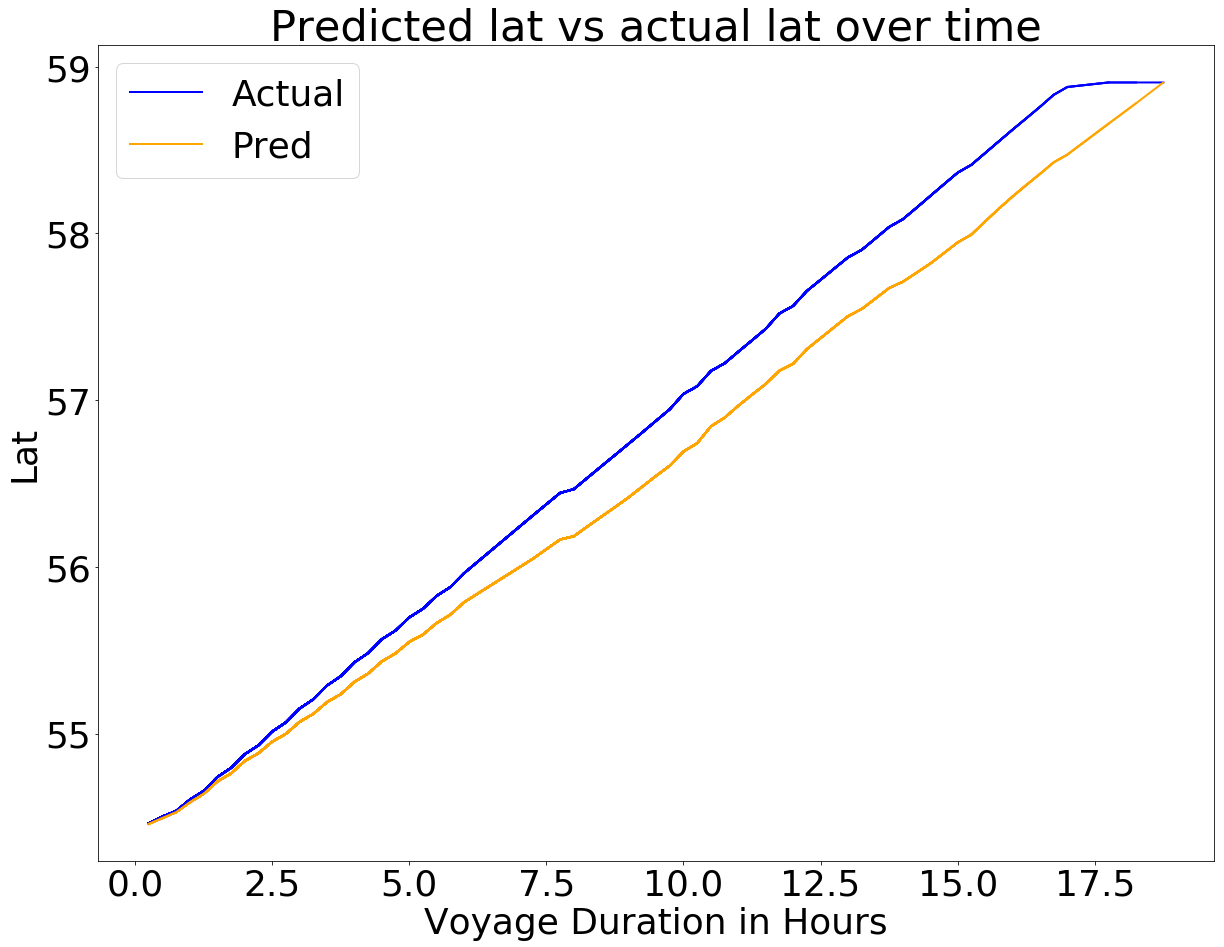

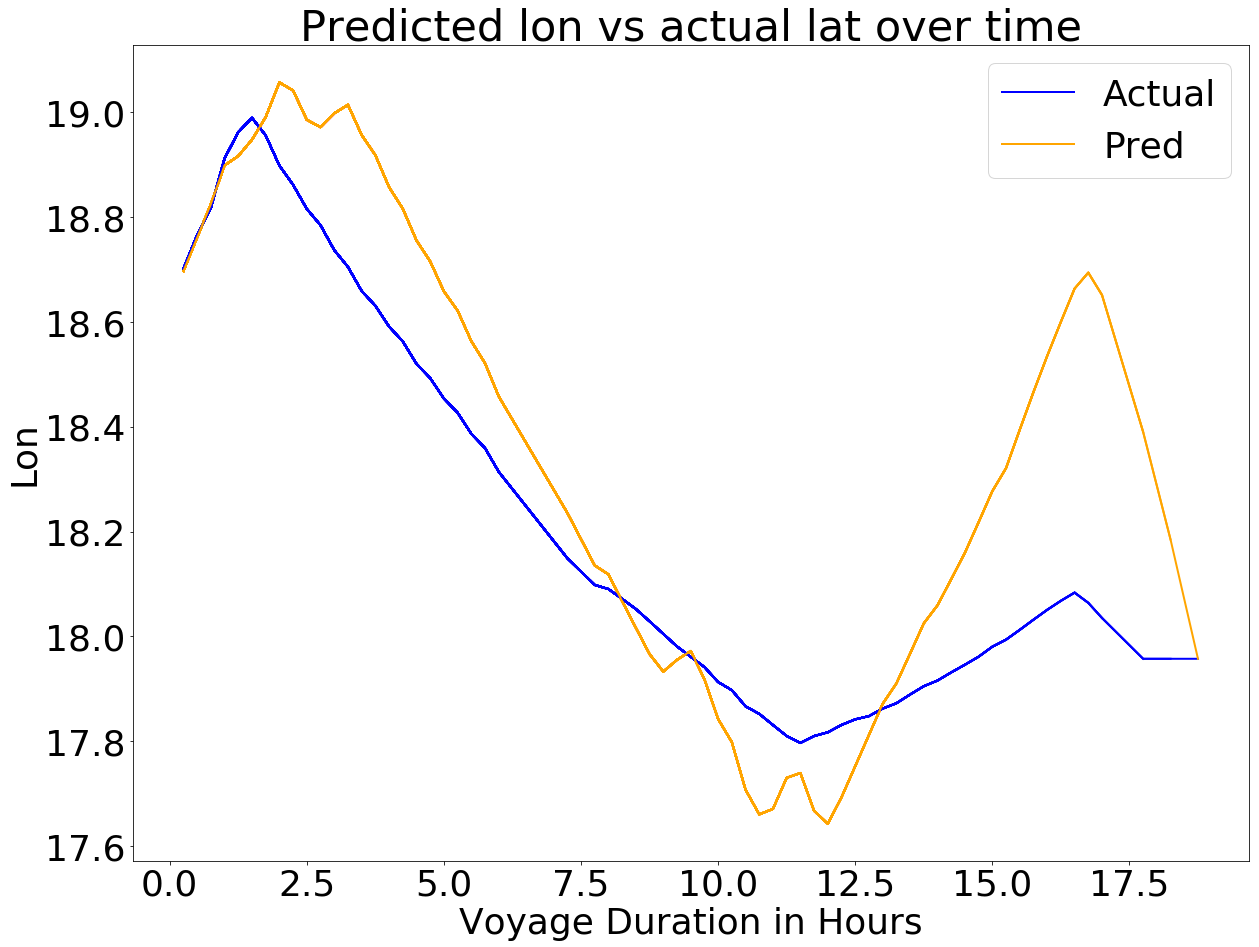

In [56]:
bins = []
labels = []
interval = 15

i = 0
while i < 121*15:
    bins.append(i)
    labels.append(int(i))
    i += interval
del labels[0]

single_route_results['interval'] = pd.cut(single_route_results['mins_to_future'], bins=bins, labels=labels)

y = []
y_pred = []
x = []

fig = plt.figure(figsize=(20,15))
for group, results in single_route_results[single_route_results.voyage == 6174].groupby('interval'):
    if np.isnan(group):
        group = 0
    if len(results) == 0:
        continue
    y.append(results.iloc[0].actual_lat)
    y_pred.append(results.iloc[0].pred_lat)
    label = vessel_type
    x.append(group/60)
    plt.plot(x, y, alpha=1, c='blue', linewidth=2, label='Actual')
    plt.plot(x, y_pred, alpha=1, c='orange', linewidth=2, label='Pred')

plt.title(f"Predicted lat vs actual lat over time")
plt.ylabel("Lat")
plt.xlabel("Voyage Duration in Hours")
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)
plt.show()

y = []
y_pred = []
x = []

fig = plt.figure(figsize=(20,15))
for group, results in single_route_results[single_route_results.voyage == 6174].groupby('interval'):
    if np.isnan(group):
        group = 0
    if len(results) == 0:
        continue
    y.append(results.iloc[0].actual_lon)
    y_pred.append(results.iloc[0].pred_lon)
    label = vessel_type
    x.append(group/60)
    plt.plot(x, y, alpha=1, c='blue', linewidth=2, label='Actual')
    plt.plot(x, y_pred, alpha=1, c='orange', linewidth=2, label='Pred')

plt.title(f"Predicted lon vs actual lat over time")
plt.ylabel("Lon")
plt.xlabel("Voyage Duration in Hours")
#plt.yticks(np.arange(17, 23, 0.5)) 
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)
plt.show()